# Trees and Graphs
**Trees vs. Binary Trees**
A binary tree is a tree in which each node has up to two children . Not all trees are binary trees. For example,
this tree is not a binary tree. You could call it a ternary tree.

**Binary Tree vs. Binary Search Tree**
A binary search tree is a binary tree in which every node fits a specific ordering property: a left descendents <= n < all right descendents.This must be true for each node n.

**Balanced vs. Unbalanced**
Note that balancing a tree does not mean the left and right subtrees are exactly the same size.One way to think about it is that a "balanced" tree really means something more like "not terribly imbalanced:'It's balanced enough to ensure O(log n) times for insert and find,but it's not necessarily as balanced as it could be.

**Complete Binary Trees**
A complete binary tree is a binary tree in which every level of the tree is fully filled, except for perhaps the
last level. To the extent that the last level is filled, it is filled left to right.

**Full Binary Trees**
A full binary tree is a binary tree in which every node has either zero or two children.That is, no nodes have
only one child.

**Perfect Binary Trees**
A perfect binary tree is one that is both full and complete. All leaf nodes will be at the same level, and this
level has the maximum number of nodes.

**In-Order Traversal**
In-order traversal means to "visit" (often, print) the left branch, then the current node, and finally, the right branch.
Pre-Order Traversal
Pre-order traversal visits the current node before its child nodes (hence the name "pre-order").
Post-Order Traversal
Post-order traversal visits the current node after its child nodes (hence the name "post-order").

**Binary Heaps (Min-Heaps and Max-Heaps)**
We'll just discuss min-heaps here. Max-heaps are essentially equivalent, but the elements are in descending order rather than ascending order.

A min-heap is a complete binary tree (that is, totally filled other than the rightmost elements on the last level) where each node is smaller than its children. The root, therefore, is the minimum element in the tree

We have two key operations on a min-heap: insert and extract_min. Insert
When we insert into a min-heap, we always start by inserting the element at the bottom.We insert at the rightmost spot so as to maintain the complete tree property.

Then, we "fix" the tree by swapping the new element with its parent, until we find an appropriate spot for the element. We essentially bubble up the minimum element.


## 785. Is Graph Bipartite?
<div class="alert alert-block alert-success">
Given an undirected graph, return true if and only if it is bipartite.

Recall that a graph is bipartite if we can split it's set of nodes into two independent subsets A and B such that every edge in the graph has one node in A and another node in B.

The graph is given in the following form: graph[i] is a list of indexes j for which the edge between nodes i and j exists.  Each node is an integer between 0 and graph.length - 1.  There are no self edges or parallel edges: graph[i] does not contain i, and it doesn't contain any element twice.

Example 1:
Input: [[1,3], [0,2], [1,3], [0,2]] <br>
Output: true <br>
Explanation: The graph looks like this: <br>
0----1 <br>
|    | <br>
|    | <br>
3----2 <br>
We can divide the vertices into two groups: {0, 2} and {1, 3}.
</div>

We try to use two colors to color the graph and see if there are any adjacent nodes having the same color.

Initialize a color[] array for each node. Here are three states for colors[] array:
1. 0: Haven't been colored yet.
1. 1: Blue.
1. -1: Red.

For each node,

* If it hasn't been colored, use a color to color it. Then use the other color to color all its adjacent nodes (DFS).
* If it has been colored, check if the current color is the same as the color that is going to be used to color it. 

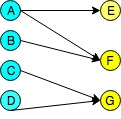

In [ ]:
def isBipartite(graph):
        color = {}
        def dfs(pos):
            for i in graph[pos]:
                if i in color:
                    if color[i] == color[pos]: return False
                else:
                    color[i] = -color[pos]
                    if not dfs(i): return False
            return True
        for i in range(len(graph)):
            if i not in color: color[i] = 1
            if not dfs(i): return False
        return True
print(isBipartite([[1,3],[0,2],[1,3],[0,2]]))


In [ ]:
import collections
def isBipartite(graph):        
    n, colored = len(graph), {}
    for i in range(n):
        if i not in colored :
            colored[i] = 1
            q = collections.deque([i])
            while q:
                cur = q.popleft()
                for nb in graph[cur]:
                    if nb not in colored:
                        colored[nb] = -colored[cur]
                        q.append(nb)
                    elif colored[nb] == colored[cur]:
                        return False
    return True

print(isBipartite([[1,3],[0,2],[1,3],[0,2]]))

## 102. Binary Tree Level Order Traversal
<div class="alert alert-block alert-success">
Given a binary tree, return the level order traversal of its nodes' values. (ie, from left to right, level by level).
</div>
Some level order traversal questions.

* Binary Tree Level Order Traversal
* Binary Tree Level Order Traversal II
* Binary Tree Zigzag Level Order Traversal
* Average of Levels in Binary Tree
* Binary Tree Right Side View
* Find Largest Value in Each Tree Row
* Populating Next Right Pointers in Each Node



In [ ]:
def levelOrder(self, root):
    if not root:
        return []
    queue = [[root]]
    for level in queue:
        lists = []
        for node in level:
            if node.left:
                lists.append(node.left)
            if node.right:
                lists.append(node.right)
        if lists:
            queue.append(lists)
    return [[x.val for x in level] for level in queue]


In [ ]:
class TreeNode:
    def __init__(self, x):
            self.val = x
            self.left = None
            self.right = None

def levelOrder(root):
    res = []
    if not root:
        return res
    dfs(res,root,1)
    return res;
        
def dfs(res, node, level):
    if not node:
        return
    cur = []
    if level > len(res): # reach new level
        res.append([node.val])
    else:
        res[level-1].extend([node.val])
    self.dfs(res,node.left, level+1)
    self.dfs(res,node.right,level+1)

Given a binary tree, return the bottom-up level order traversal of its nodes' values. (ie, from left to right, level by level from leaf to root).

In [ ]:
def levelOrderBottom(self, root):
    stack = [(root,0)]
    res =[]
    while stack:
        node,level = stack.pop()
        if node:
            if level +1 > len(res):
                res.insert(0,[])
            res[-(level+1)].append(node.val)
            stack.append()